<img src="imagenes/john_holland.jpg" alt="John Holland, inventor de los algoritmos genéticos" style="width: 300px;"/>

$$John \, H. \, Holland \, (1929 - 2015)$$

> *I have more ideas than I can ever follow up on in a lifetime, so I never worry if someone steals an idea from me*. 

>Físico y matemático

>Profesor de Ciencias de la Computación, Ingeniería Eléctrica y Psicología (sí, Psicología)

>Padre del algoritmo genético y pionero de los sistemas complejos adaptativos

In [1]:
from IPython.core.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import numpy as np
import pandas as pd
import random as random
from scipy.interpolate import interp1d
from IPython.html.widgets import interact
import matplotlib.pyplot as plt
%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


#Resolución directa de problemas

Normalmente, cuando tenemos un problema intentamos resolverlo directamente. Es decir, a partir de las premisas del problema, aplicamos un método que nos ofrece una solución que cumpla las premisas y nos quedamos a gusto. 

$$PROBLEM - \underline{method} \, -> SOLUTION$$

Muchos de los problemas que intentamos resolver (por no decir todos) son problemas de optimización. Un problema de optimización es aquel en el que intentamos minimizar o maximizar el valor de algo. Por ejemplo: ¿qué carrocería ofrece menos resistencia aerodinámica? ¿en qué momentos debo comprar y vender para maximizar mi beneficio en este mercado bursátil? ¿qué regalo le gustará más a mi novia?

Imaginemos que queremos optimizar la cantidad de sueño que disfrutamos cada noche y que conocemos la función del descanso con el tiempo de sueño (en horas):

$$Descanso = \frac{1}{2200} \cdot (tiempo^3 - 50 \cdot tiempo ^2 + 600 \cdot tiempo)$$

In [3]:
num_hora = 20
horas = np.linspace(0, 12, num_hora*12+1)
descanso = [(tiempo**3 - 50*tiempo**2 + 600*tiempo)/2200 for tiempo in horas]

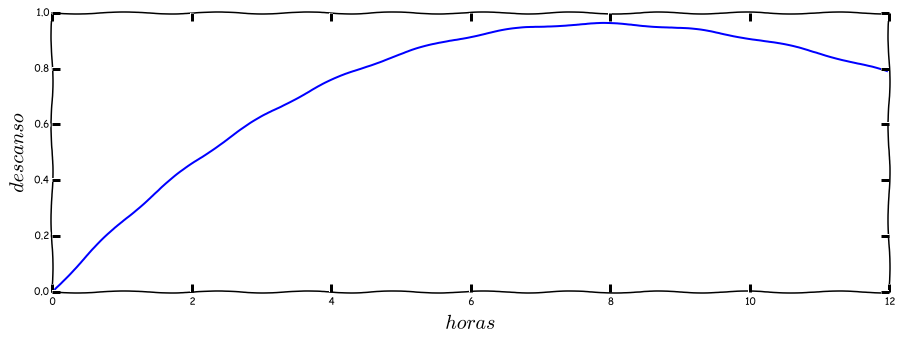

In [4]:
with plt.xkcd():
    plt.figure(figsize=(15, 5))
    plt.plot(horas, descanso)
    plt.xlabel("$horas$", fontsize=20)
    plt.ylabel("$descanso$", fontsize=20)

La teoría de la optimización nos dice que debemos derivar esta función e igualar el resultado a 0 para calcular el máximo local. Obtenemos:

$$\frac {d}{d t}(Descanso) = \frac{1}{2200} \cdot (3 \cdot tiempo^2 - 100 \cdot tiempo + 600) = 0$$

Aplicando el método de resolución de ecuaciones cuadráticas:

$$ tiempo_{max} = \frac {100 - \sqrt {100^2 - 4 \cdot 3 \cdot 600}}{2 \cdot 3} = 7.85 \, h $$

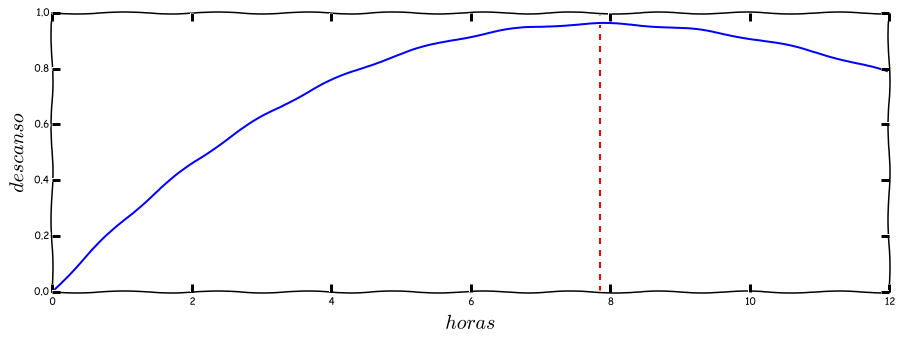

In [5]:
hora_max = 7.85
with plt.xkcd():
    plt.figure(figsize=(15, 5))
    plt.plot(horas, descanso)
    plt.vlines(hora_max, 0, 1, colors = 'r' ,linestyles = 'dashed')
    plt.xlabel("$horas$", fontsize=20)
    plt.ylabel("$descanso$", fontsize=20)

#Resolución de problemas mediante métodos heurísticos

Muchas veces no contamos con un método de resolución directo. A veces no sabemos de qué relaciones depende el problema o el sistema de ecuaciones que lo gobierna es trascendental (es decir, no tiene solución), como las ecuaciones de Navier-Stokes. Muchas veces, las funciones de las que depende el problema simplemente no son derivables o es muy complicado derivarlas. En todos estos casos hay que recurrir a un método heurístico para tratar de resolver el problema:

$$proposed \, solution - \underline{PROBLEM} \, -> evaluation$$
$$proposed \, solution - \underline{PROBLEM} \, -> evaluation$$
$$proposed \, solution - \underline{PROBLEM} \, -> evaluation$$
$$...$$

Veamos, por ejemplo, cómo se complica el problema anterior añadiendo algunas consideraciones adicionales. Se ha demostrado que el sueño no es un proceso continuo, sino que pasa por una serie de ciclos de unos 90 minutos, en los que el nivel alerta evoluciona siguiendo un patrón típico como el siguiente:

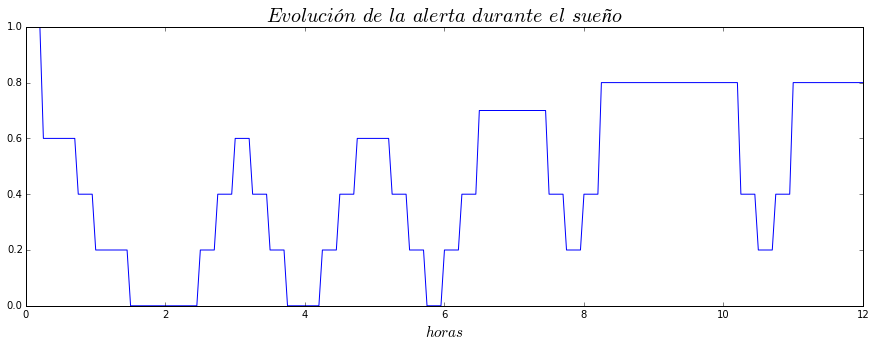

In [6]:
vigilia = []
vigilia += 5 * [1]
vigilia += 10 * [0.6] 
vigilia += 5 * [0.4] 
vigilia += 10 * [0.2] 
vigilia += 20 * [0] 
vigilia += 5 * [0.2] 
vigilia += 5 * [0.4] 
vigilia += 5 * [0.6] 
vigilia += 5 * [0.4] 
vigilia += 5 * [0.2] 
vigilia += 10 * [0] 
vigilia += 5 * [0.2]
vigilia += 5 * [0.4] 
vigilia += 10 * [0.6] 
vigilia += 5 * [0.4] 
vigilia += 5 * [0.2] 
vigilia += 5 * [0] 
vigilia += 5 * [0.2]
vigilia += 5 * [0.4]
vigilia += 20 * [0.7]
vigilia += 5 * [0.4] 
vigilia += 5 * [0.2] 
vigilia += 5 * [0.4]
vigilia += 40 * [0.8]
vigilia += 5 * [0.4] 
vigilia += 5 * [0.2] 
vigilia += 5 * [0.4]
vigilia += 21 * [0.8]

plt.figure(figsize=(15,5))
plt.plot(horas, vigilia)
plt.title('$Evolución \, de \, la \, alerta \, durante \, el \, sueño$', fontsize=20)
plt.xlabel("$horas$", fontsize=15)

Naturalmente, es más fácil despertar cuando el nivel de alerta es más alto y además la sensación de descanso es mayor. En cambio, si se fuerza el despertar (por ejemplo mediante un despertador) en un momento del ciclo en el que el sueño es muy profundo, nos despertamos abotargados y cansados. La evolución del descanso seguirá una evolución como la siguiente:

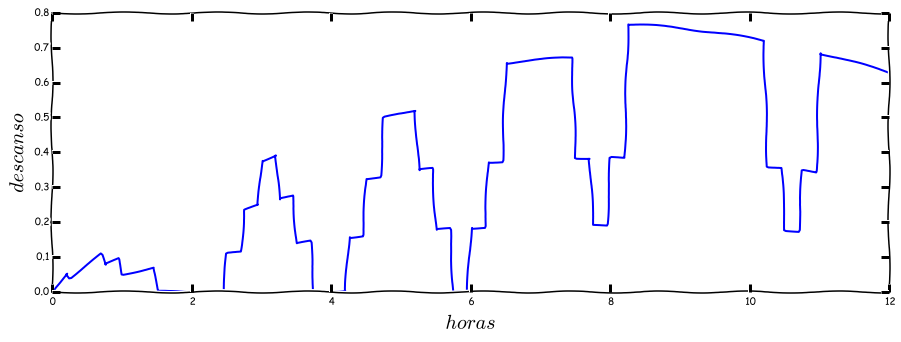

In [7]:
descanso_ciclos = list(np.array(vigilia)*np.array(descanso))
descanso_nuevo = interp1d (horas, descanso_ciclos)

with plt.xkcd():
    plt.figure(figsize=(15,5))
    plt.plot(horas, descanso_nuevo(horas))
    plt.xlabel("$horas$", fontsize=20)
    plt.ylabel("$descanso$", fontsize=20)

Esta función ni siquiera es derivable, ¿cómo podemos encontrar el óptimo? Un método heurístico muy sencillo consistiría en muestrear la función con un nivel de precisión suficiente y escoger el punto que se corresponda con el nivel de descanso más alto:

In [8]:
data = {
    'Tiempo de descanso (horas)' : horas,
    'Nivel de descanso' : descanso_nuevo(horas)
}

catalogue = pd.DataFrame(data, 
                         columns = ['Tiempo de descanso (horas)',  'Nivel de descanso' ], 
                         index = ['Muestra ' + str(i) for i in range(1, len(descanso_ciclos)+1)]
                        )
catalogue

,Tiempo de descanso (horas),Nivel de descanso
Muestra 1,0.00,0.000000
Muestra 2,0.05,0.013580
Muestra 3,0.10,0.027046
Muestra 4,0.15,0.040399
Muestra 5,0.20,0.053640
Muestra 6,0.25,0.040061
Muestra 7,0.30,0.047871
Muestra 8,0.35,0.055614
Muestra 9,0.40,0.063290
Muestra 10,0.45,0.070900


El óptimo resulta ser:

In [9]:
index_max = descanso_ciclos.index(max(descanso_ciclos))
hora_max = horas[index_max]
catalogue[index_max : index_max+1]

,Tiempo de descanso (horas),Nivel de descanso
Muestra 166,8.25,0.766688


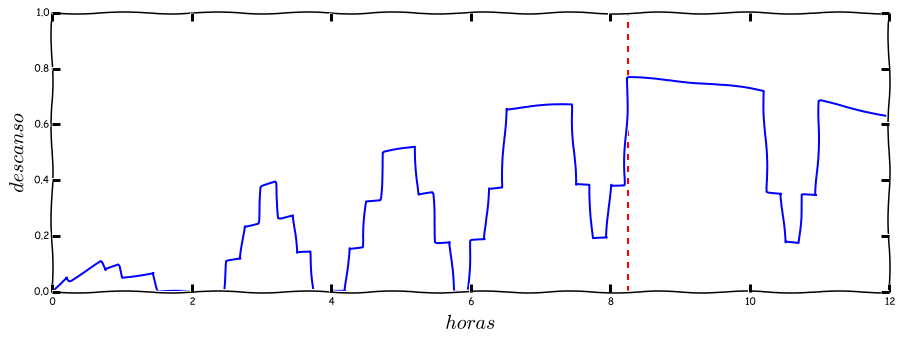

In [10]:
with plt.xkcd():
    plt.figure(figsize=(15,5))
    plt.plot(horas, descanso_nuevo(horas))
    plt.xlabel("$horas$", fontsize=20)
    plt.ylabel("$descanso$", fontsize=20)
    plt.vlines(hora_max, 0, 1, colors = 'r' ,linestyles = 'dashed')

Este es un método heurístico muy sencillo y muy eficaz, pero no es muy eficiente. Para obtener un óptimo con la precisión deseada hemos evaluado 241 muestras, de las que hemos retenida sólo una. Es decir, **hemos desechado el 99,6 % de las soluciones propuestas**.

Este método es apropiado para un problema sencillo como éste.  Sin embargo, cuando el espacio de soluciones es muy amplio o cuando la evaluación de la solución propuesta es difícil, los tiempos de cálculo se vuelven inaceptables y es necesario recurrir a métodos heurísticos más inteligentes, como el algoritmo genético.

#¿Qué es un algoritmo genético?

Es habitual, en el proceso de diseño o de optimización encontrarse con:

* Ecuaciones no derivables (o que nos da pereza derivar)
* Sistemas de ecuaciones trascendentales (o que no sabemos resolver)
* Relaciones que desconocemos (o que no comprendemos)
* Múltiples factores que interactúan simultáneamente
* Condiciones cambiantes
* ...

Y entonces surgen preguntas como las siguientes:

* ¿Cómo resolver *fácilmente* un problema que con una formulación complicada?
* ¿Cómo evaluar una solución cuándo queremos optimizar varios factores al mismo tiempo?
* ¿Cómo solucionar un problema cuyas condiciones evolucionan todo el tiempo?


Por muy complicado que nos parezcan, hasta los seres vivos más primitivos llevan resolviendo problemas como estos desde *siempre*. La supervivencia es un problema complejo, donde intervienen una cantidad inconmensurable de factores que no se sabe muy bien cómo interactúan entre sí y que, para colmo, cambian geográficamente y evolucionan rápidamente a lo largo del tiempo.

Los algoritmos evolutivos nacen de una analogía entre la optimización y la selección natural.

>*My own idiosyncratic view is that the reason scientists burn out early is that they dig very deep in one area and they’ve gone as far as its humanly possible at that time and then they can’t easily cross over into other areas. 
I think at the heart of most creative science are well thought-out metaphors, and cross-disciplinary work is a rich source of metaphor*. John Henry Holland

Miremos alrededor y veamos la biodiversidad del mundo. Tenemos seres humanos, enormes elefantes herbívoros, feroces tigres, mansos perritos, minúsculas e industriosas hormigas, árboles grandes y pequeños, setas de colores, peces y mamíferos marinos, bacterias y viruses...

**Soluciones diferentes para el mismo problema: ¿cómo hay que ser para reproducirse lo más posible?**

¿Cómo podemos emular a la selección natural para resolver un problema de diseño? Veámoslo con un ejemplo.

#Ejemplo: cómo aplicar el algoritmo genético

¿Cómo se plantearía el problema de optimización de las horas de sueño de tal manera que se pueda resolver con un algoritmo genético?

Primero necesitamos poder generar soluciones, "individuo" con unas características determinadas que cumplen mejor o peor nuestro objetivo de descansar bien. Por el momento vamos a definir una clase que nos dé un marco general para definirlos e iremos profundizando en lo que quiere decir cada uno de sus atributos.

In [11]:
class Individual (object):
    
    def __init__(self, genome):
        
        self.genome = genome        
        self.traits = {}
        self.performances = {}
        self.fitness = 0

El genoma es donde está codificada la información que sirve para construir una solución. Mientras se sea coherente, el genoma se puede definir con total libertad según se necesite: números reales, enteros, letras... En el mundo informático todo está codificado en estados binarios, así que haremos que nuestro genoma será una cadena de ceros y unos. 

Para ello vamos a utilizar un diccionario genético que defina los genes de nuestro individuo y su longitud. En este caso, nuestro individuo sólo presenta una característica, que son las horas de sueño, por lo que sólo habrá un gen. Vamos a estudiar el óptimo en un rango de 0 - 12 horas con una precisión de 0,05 horas, por lo que necesitamos poder representar $\frac{12}{0.05} = 240 $ estados diferentes como mínimo. Vamos a ir más allá y vamos a utilizar 10 dígitos, que nos permiten codificar 1024 estados diferentes.

In [12]:
dict_genes = {
    'Horas de sueño' : 10,
}

Vamos a necesitar crear individuos aleatorios, para lo que utilizaremos una función "Generar genoma":

In [13]:
generate_random_binary_list = lambda n: [random.randint(0,1) for b in range(1,n+1)]

def generate_genome (dict_genes):
    
    #We first calculate the total number of bits that the genome must contain
    number_of_bits = sum([dict_genes[trait] for trait in dict_genes])
    
    #And we return a random genome of this length
    return generate_random_binary_list(number_of_bits)

In [14]:
[generate_genome(dict_genes) for i in range (4)]

[[0, 1, 0, 1, 1, 1, 0, 1, 1, 1],
 [0, 1, 1, 1, 1, 1, 1, 0, 1, 0],
 [1, 0, 1, 0, 0, 1, 0, 1, 1, 0],
 [0, 0, 1, 0, 0, 1, 1, 0, 0, 1]]

Cuando ya tengamos nuestros individuos, con su material genético, necesitaremos una función que nos descifre este código y lo traduzca a características reconocibles del mismo. En el mundo real sería como leer el "gen del color de los ojos" (en realidad son varios genes) para descubrir que el contenido de ese gen en concreto indica que el individuo tiene "ojos azules".

In [15]:
def calculate_traits (individual, dict_genes):
    #This function must decipher the genome and return the traits of the individual.
    #Normally, the genome contains binary numerical values for the different traits.
    
    dict_traits = {}
    index = 0
    
    for trait in dict_genes:
        step = 12 / (int(dict_genes[trait]*'1',2))
        dict_traits[trait] = step*int(''.join(str(bit) for bit in individual.genome[index : index+dict_genes[trait]]), 2)
        index += dict_genes[trait]
        
    individual.traits = dict_traits

In [16]:
individuo = Individual(generate_genome(dict_genes))
calculate_traits (individuo, dict_genes)

print(individuo.genome)
print(individuo.traits)

[0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
{'Horas de sueño': 2.252199413489736}


En el mundo natural, las características de un individuo determinarán en gran parte cómo de bien o de mal se desenvolverá en la vida, esto es, sus "actuaciones", "desempeño" o, en inglés, su "performance". Si tiene las piernas más largas, podrá correr más rápido; si tiene unos dientes afilados, podrá defenderse mejor... En nuestro ejemplo esto no es ni más ni menos que el eje vertical de nuestra función de descanso. También vamos a añadir una "performance" cuyo valor sea el tiempo de descanso, lo cual puede ser interesante para evaluar la calidad de la solución, como veremos luego.

In [17]:
def calculate_performances (individual):
    
    dict_perfo = {
        
        'Descanso' : float(descanso_nuevo (individual.traits['Horas de sueño'])),
        'Tiempo' : individual.traits['Horas de sueño']
    }
    
    individual.performances = dict_perfo

In [18]:
individuo = Individual(generate_genome(dict_genes))
calculate_traits (individuo, dict_genes)
calculate_performances (individuo)

print(individuo.traits)
print(individuo.performances)

{'Horas de sueño': 7.788856304985337}
{'Tiempo': 7.788856304985337, 'Descanso': 0.1920462789922687}


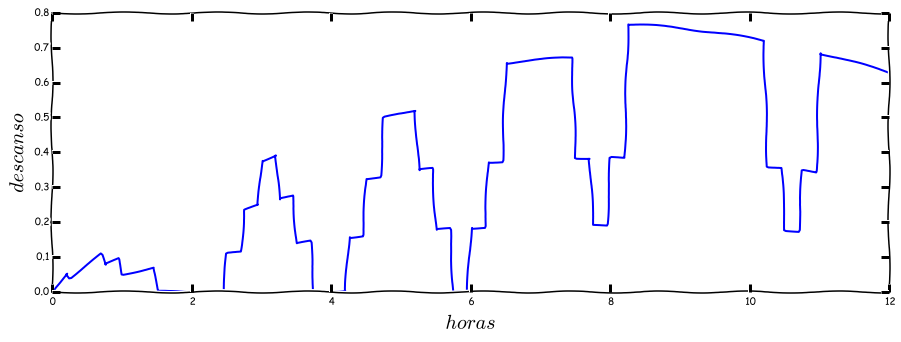

In [19]:
with plt.xkcd():
    plt.figure(figsize=(15,5))
    plt.plot(horas, descanso_nuevo(horas))
    plt.xlabel("$horas$", fontsize=20)
    plt.ylabel("$descanso$", fontsize=20)

Según sean de buenas sus actuaciones, el individuo será más apto, estará mejor adaptado. En nuestro problema se trata de **definir qué es una solución buena**, y aquí se haya una de las armas más potentes del algoritmo genético. **El algoritmo genético nos obliga a definir qué es lo que estamos buscando en nuestro proceso de optimización mediante una función.**

En nuestro ejemplo, la calidad del sueño es importante, pero tal vez no queramos optimizarla a toda costa. En ciertas circunstancias podemos desear descansar un poco menos si ello nos permite ahorrar un par de horas. El peso relativo entre estos dos factores lo vamos a representar mediante unos pesos $\alpha$ y $\beta$ que intervienen en la función de aptitud, que podemos definir así:
$$ Aptitud = \alpha \cdot Descanso + \beta \cdot \frac{12 \, horas - Tiempo}{12 \, horas } $$

In [20]:
def calculate_fitness (individual):
    
    alpha = 1
    beta = 0
    
    individual.fitness = alpha*individual.performances['Descanso'] + beta*((12 - individual.performances['Tiempo'])/12)

In [21]:
individuo = Individual(generate_genome(dict_genes))
calculate_traits (individuo, dict_genes)
calculate_performances (individuo)
calculate_fitness (individuo)

print(individuo.performances)
print(individuo.fitness)

{'Tiempo': 0.7272727272727273, 'Descanso': 0.09095212809917358}
0.09095212809917358


Ahora ya podemos generar nuestras soluciones y tenemos medios para evaluarlas. Es hora de hacer que la selección natural haga su trabajo.

Primero necesitamos crear una población. Una manera de hacer esto es mediante una función de inmigración, que genere una sociedad formada por una determinada cantidad de individuos exóticos, generados de manera aleatoria:

In [22]:
def immigration (society, target_population, dict_genes):
    
    while len(society) < target_population:
        
        new_individual = Individual (generate_genome (dict_genes))
        calculate_traits (new_individual, dict_genes)
        calculate_performances (new_individual)
        calculate_fitness (new_individual)
        
        society.append (new_individual)

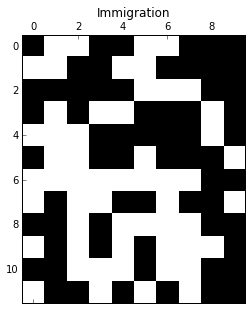

In [23]:
society = []
immigration (society, 12, dict_genes)

plt.matshow([individual.genome for individual in society], cmap=plt.cm.gray)
plt.title('Immigration')

Ahora, los individuos de esta sociedad se reproducen entre ellos, generando nuevos individuos. Los individuos más aptos tienen más probabilidades de reproducirse que los menos aptos, con lo que las mejores soluciones generan más descendencia. Durante la concepción, los nuevos individuos sufren pequeñas mutaciones aleatorias. Después nacen y se incorporan a la sociedad.

In [24]:
#This function was taken from Eli Bendersky's website
#It returns an index of a list called "weights", 
#where the content of each element in "weights" is the probability of this index to be returned.
#For this function to be as fast as possible we need to pass it a list of weights in descending order.
def weighted_choice_sub(weights):
    """
    weights = [0.9, 0.05, 0.05]
    N = 100000
    lista = [weighted_choice_sub(weights) for ii in range(N)]
    print( lista.count(0)/N, lista.count(1)/N, lista.count(2)/N)
    """
    rnd = random.random() * sum(weights)
    for i, w in enumerate(weights):
        rnd -= w
        if rnd < 0:
            return i

def crossover (society, reproduction_rate, mutation_rate):
    
    #First we create a list with the fitness values of every individual in the society
    fitness_list = [individual.fitness for individual in society]
    
    #We sort the individuals in the society in descending order of fitness.   
    society_sorted = [x for (y, x) in sorted(zip(fitness_list, society), key=lambda x: x[0], reverse=True)] 
    
    #We then create a list of relative probabilities in descending order, 
    #so that the fittest individual in the society has N times more chances to reproduce than the least fit,
    #where N is the number of individuals in the society.
    probability = [i for i in reversed(range(1,len(society_sorted)+1))]
    
    #We create a list of weights with the probabilities of non-mutation and mutation
    mutation = [1 - mutation_rate, mutation_rate]    
    
    #For every new individual to be created through reproduction:
    for i in range (int(len(society) * reproduction_rate)):
        
        #We select two parents randomly, using the list of probabilities in "probability".
        father, mother = society_sorted[weighted_choice_sub(probability)], society_sorted[weighted_choice_sub(probability)]
        
        #We randomly select two cutting points for the genome.
        a, b = random.randrange(0, len(father.genome)), random.randrange(0, len(father.genome))
        
        #And we create the genome of the child putting together the genome slices of the parents in the cutting points.
        child_genome = father.genome[0:min(a,b)]+mother.genome[min(a,b):max(a,b)]+father.genome[max(a,b):]
        
        #For every bit in the not-yet-born child, we generate a list containing 
        #1's in the positions where the genome must mutate (i.e. the bit must switch its value)
        #and 0's in the positions where the genome must stay the same.
        n = [weighted_choice_sub(mutation) for ii in range(len(child_genome))]
        
        #This line switches the bits of the genome of the child that must mutate.
        mutant_child_genome = [abs(n[i] -  child_genome[i]) for i in range(len(child_genome))]
        
        #We finally append the newborn individual to the society
        newborn = Individual(mutant_child_genome)
        calculate_traits (newborn, dict_genes)
        calculate_performances (newborn)
        calculate_fitness (newborn)
        society.append(newborn)        

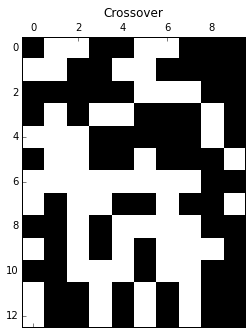

In [25]:
crossover(society, 1/12, 1/16)
plt.matshow([individual.genome for individual in society], cmap=plt.cm.gray)
plt.title('Crossover')

En el mundo natural, la escasez de recursos obliga a los individuos a competir. Una función de torneo escoge parejas de soluciones al azar, las compara y elimina las menos aptas.

In [26]:
def tournament(society, target_population):
    
    while len(society) > target_population:
        
        #index1, index2 = random.randrange(0, len(society)), random.randrange(0, len(society))
        #if society[index1].fitness > society[index2].fitness:
        #    society.pop(index2)
        #else:
        #    society.pop(index1)
                
        fitness_list = [individual.fitness for individual in society]
        society.pop(fitness_list.index(min(fitness_list)))

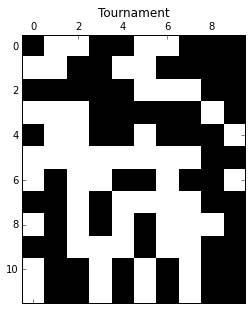

In [27]:
tournament (society, 12)
plt.matshow([individual.genome for individual in society], cmap=plt.cm.gray)
plt.title('Tournament')

Veamos ahora, animado, cómo evoluciona la población:

<img src="imagenes/imm_cross_tour.gif" alt="" style="width: 300px;"/>

<img src="imagenes/genome_animation.gif" alt="" style="width: 300px;"/>

<img src="imagenes/points_animation.gif" alt="" style="width: 1000px;"/>

Ahora podemos crear una función que aplique el algoritmo genético a este problema concreto:

In [259]:
def optimise_sleep (number_of_genes = 10,
                    size_of_society = 30, 
                    reproduction_rate = 0.2, 
                    mutation_rate = 0.05, 
                    number_of_generations = 20,
                    size_after_tournament = 20
                   ):

    
    dict_genes = {'Horas de sueño' : number_of_genes}
    
            
    society = []
    fitness_max = []
    fitness_avg = []

    for generation in range(number_of_generations):
    
        immigration (society, size_of_society, dict_genes)
        fitness_max += list([max([individual.fitness for individual in society])])
        fitness_avg += list([np.mean([individual.fitness for individual in society])])
        crossover(society, reproduction_rate, mutation_rate)
        tournament (society, size_after_tournament)
    
    fitness_list = [individual.fitness for individual in society]
    winner = society[fitness_list.index(max(fitness_list))]
    
    with plt.xkcd():
        plt.figure(figsize=(15,5))
        plt.title("Óptimo a las " + str(round(winner.performances['Tiempo'], 2)) + " horas", fontsize = 15)
        plt.xlabel("$horas$", fontsize=20)
        plt.ylabel("$descanso$", fontsize=20)
        
        plt.plot(horas, descanso_nuevo(horas))
        plt.vlines(winner.performances['Tiempo'], 0, 1, colors = 'r' ,linestyles = 'dashed')
        
    plt.figure(figsize=(15,5))
    plt.plot(fitness_max)
    plt.title('$\Phi_{max} = $' + str(round(fitness_max[-1], 5)), fontsize = 15)  
    
    plt.figure(figsize=(15,5))
    plt.plot(fitness_avg)
    plt.title('$\overline{\Phi}$', fontsize = 15)  

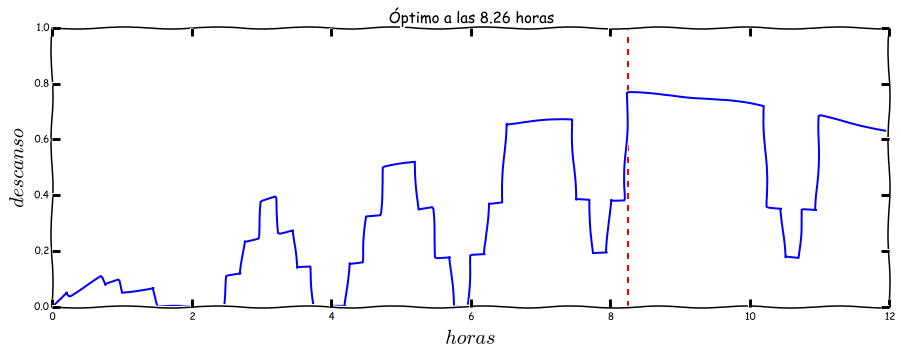

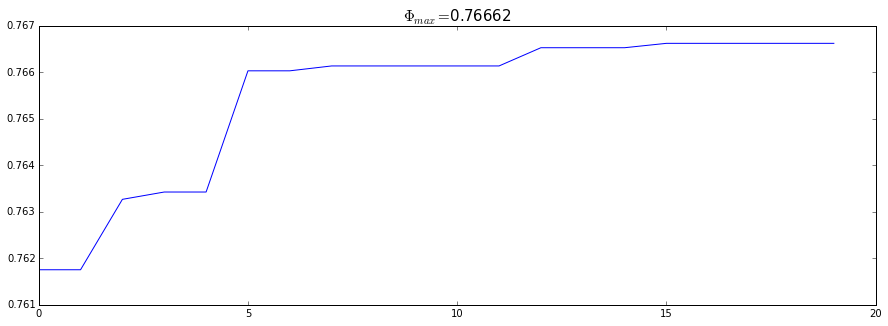

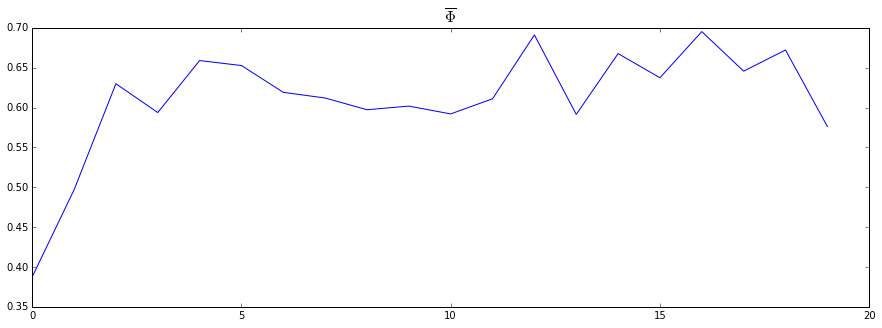

In [287]:
optimise_sleep ()

Vemos que alcanzamos el resultado con muchas menos evaluaciones de la función que el algoritmo heurístico más básico (144, frente a 241). Hemos duplicado el rendimiento para esta función 1D, pero las mejoras de rendimiento son más espectaculares cuanto mayor es la dimensión del problema que se quiere optimizar.

Sin embargo, puede que te hayas dado cuenta de que por más que ejecutes el algortimo, nunca se alcanza el verdadero óptimo, sino que nos quedamos muy, muy, cerca. ¿A qué crees que se debe? ¿Cómo lo solucionarías?

A continuación podrás experimentar con los diferentes parámetros del problema y ver cómo afectan a la optimización:

In [30]:
def calculate_fitness (individual):
    alpha = 1
    beta = 0
    individual.fitness = (alpha*individual.performances['Descanso'] + beta*((12 - individual.performances['Tiempo'])/12))/(alpha + beta)

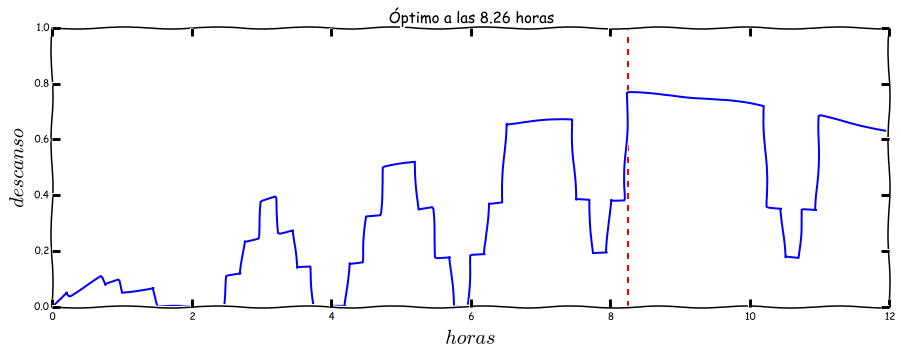

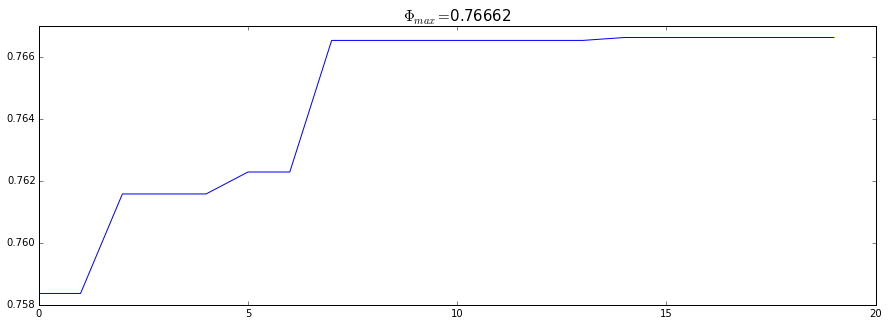

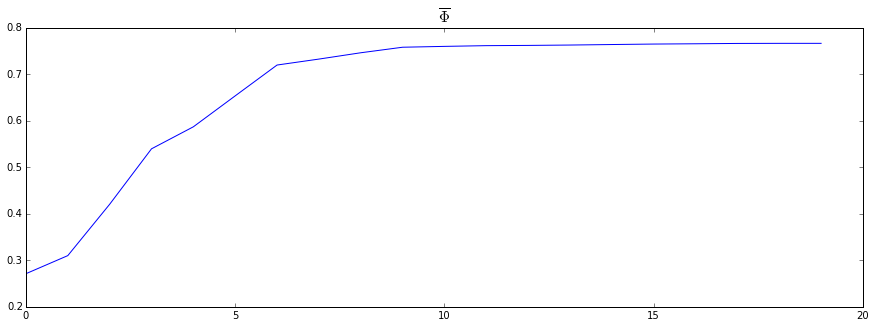

In [31]:
w = interact(optimise_sleep,
             number_of_genes = (1, 50, 1),
             size_of_society = (1, 100, 1), 
             reproduction_rate = (0, 1, 0.01), 
             mutation_rate = (0, 1, 0.01),
             number_of_generations = (1, 100, 1),
             size_after_tournament = (1, 100, 1)
            )

El tamaño del genoma, esto es, el número de bits utilizados para describir al individuo, determina la cantidad de soluciones posibles, por lo que abre la puerta a mejores optimizaciones. Un genoma mayor supone asimismo una mayor dificultad para converger, debido a que hay muchas más combinaciones posibles a probar.

El tamaño de la población es, probablemente el factor más importante. El tiempo de cálculo aumenta de forma directamente proporcional al tamaño de la población, por lo que hay que tener cuidado al elegir el tamaño apropiado.

Una población pequeña, aunque mejora los tiempos, puede ser víctima del llamado “efecto del fundador”, en los que una baja variabilidad genética en el origen y, en general, un tamaño poblacional pequeño, hacen que la “deriva genética” lleve a la población a presentar una serie de rasgos comunes que no necesariamente se corresponden con los de los individuos más aptos, que sí se observan fuera de ella.

Para evitar este problema, se pueden introducir altas tasas de inmigración y mutación. Si la población es pequeña, es muy sensible, por lo que la media de la función de aptitud evoluciona de manera muy turbulenta y puede, incluso, alejarse de la convergencia

Por el contrario, una población grande es garantía de una gran variedad genética inicial. Estadísticamente, también es más probable que se encuentre antes la solución, aunque la convergencia sea más lenta. Además, el gran número estabiliza la evolución de la función de mérito media y hace que la población sea más robusta frente a la inmigración y la mutación.